In [1]:
import h5py
import numpy as np
import skimage
import matplotlib.pyplot as plt
from astropy.io import ascii

from data.scripts.display_cutouts import stretch

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus[0], 'GPU') # need to trial and error to figure out which gpu I have been allocated. Not sure how else to get around this.

from supervised_model_prob import ImageRegressor

In [2]:
cutouts = h5py.File('/srv/scratch/mltidal/vd_cutouts.hdf', 'a')
print(list(cutouts.keys()))
for key in cutouts.keys():
    if int(key) > 54 and int(key) < 108:
        cutouts.copy(cutouts[key], str(int(key) + 53))
        del cutouts[key]
print(list(cutouts.keys()))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '8', '9']
['0', '1', '10', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '6', '7', '8', '9']


In [2]:
# Open the clusters downloaded in the wide survey and look at them compared to 
# their deep counterparts
cutouts = h5py.File('/srv/scratch/mltidal/vd_cutouts.hdf')
cutouts_dud = h5py.File('/srv/scratch/z5214005/hsc_icl/cutouts.hdf')

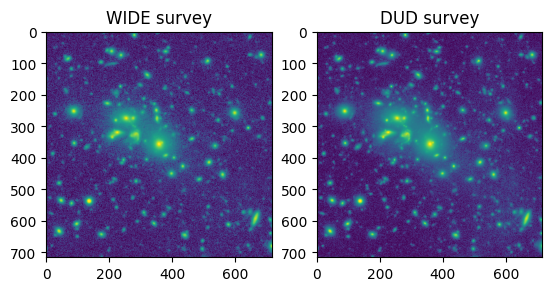

In [3]:
key = '0'

plt.subplot(121)
plt.imshow(stretch(cutouts[key]['HDU0']['DATA']))
plt.title('WIDE survey')
plt.subplot(122)
plt.title('DUD survey')
plt.imshow(stretch(cutouts_dud[key]['HDU0']['DATA']))
plt.show()

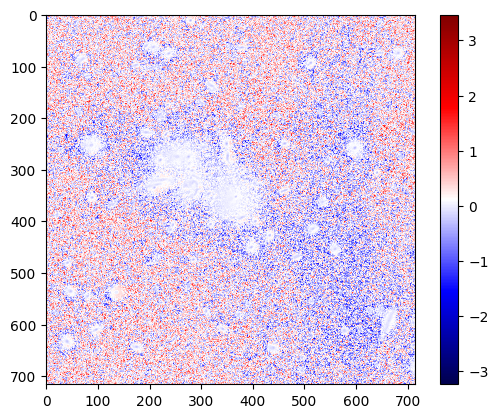

In [4]:
# What is the difference between the DUD and WIDE surveys?
key = '0'

residual = np.array(cutouts[key]['HDU0']['DATA']) - np.array(cutouts_dud[key]['HDU0']['DATA'])
plt.imshow(stretch(np.array(cutouts[key]['HDU0']['DATA'])) - stretch(np.array(cutouts_dud[key]['HDU0']['DATA'])), cmap='seismic')
plt.colorbar()
plt.show()

In [5]:
# What does the model predict on the wide images vs. the deep images?
model = ImageRegressor((224,224,1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss=lambda y, p_y: -p_y.log_prob(y))
model.load_weights('checkpoint-sup-newdatacont.ckpt').expect_partial()

# Try one image
key = '0'
cutout = np.array(cutouts[key]['HDU0']['DATA'])
img = skimage.transform.resize(cutout, (224,224))
img = np.clip(img, a_min=0, a_max=10)
img = np.arcsinh(img / 0.017359)
img = np.expand_dims(img, 0)
img = np.expand_dims(img, -1)

prediction = model(img).mean().numpy().squeeze()
print(f'Wide prediction = {prediction}')

cutout = np.array(cutouts_dud[key]['HDU0']['DATA'])
img = skimage.transform.resize(cutout, (224,224))
img = np.clip(img, a_min=0, a_max=10)
img = np.arcsinh(img / 0.017359)
img = np.expand_dims(img, 0)
img = np.expand_dims(img, -1)
prediction = model(img).mean().numpy().squeeze()
print(f'Deep prediction = {prediction}')

2023-09-22 09:45:50.641582: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-09-22 09:45:51.184575: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-22 09:45:51.184948: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-22 09:45:51.184968: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-09-22 09:45:51.185455: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-22 09:45:51.185501: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:317] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


2023-09-22 09:45:52.073709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [4]
	 [[{{node shape}}]]
2023-09-22 09:45:52.073828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [4]
	 [[{{node shape}}]]
2023-09-22 09:45:52.080923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [4]
	 [[{{node shape}}]]
2023-09-22 09:45:52.081003: I tens

Wide prediction = 0.2820293605327606
Deep prediction = 0.5697412490844727


In [6]:
# Look at the model's predictions compared to the expected fractions
fracs = np.load('/srv/scratch/z5214005/precalc_fracs/fracs.npy')[2]
not_nans = np.where(~np.isnan(fracs))[0]

# Create an array of images that we have fractions for
dataset = []
expected = []
valid_ids = []
for idx in not_nans:
    if str(idx) not in cutouts:
        continue
    cutout = np.array(cutouts[str(idx)]['HDU0']['DATA'])
    img = skimage.transform.resize(cutout, (224,224))
    img = np.clip(img, a_min=0, a_max=10)
    img = np.arcsinh(img / 0.017359)
    img = np.expand_dims(img, -1)
    dataset.append(img)
    expected.append(fracs[idx])
    valid_ids.append(idx)

dataset = np.array(dataset)

In [7]:
# Get predictions for all of these fractions
predictions = model(dataset).mean().numpy().squeeze()
predictions

2023-09-22 09:45:54.467772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [4]
	 [[{{node shape}}]]
2023-09-22 09:45:54.468338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [4]
	 [[{{node shape}}]]
2023-09-22 09:45:54.475941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'shape' with dtype int32 and shape [4]
	 [[{{node shape}}]]
2023-09-22 09:45:54.476013: I tens

array([0.27850434, 0.18197276, 0.10217316, 0.18977132, 0.27234626,
       0.18416187, 0.18577361, 0.12519154, 0.24175614, 0.11535889,
       0.17427424, 0.17856784, 0.07955955, 0.15385395, 0.25044227,
       0.22858104, 0.2563419 , 0.22849771, 0.25842297, 0.24257468,
       0.2971845 , 0.18854979, 0.13264452, 0.14921407, 0.3690755 ,
       0.48795378, 0.27595907, 0.09599674, 0.31104353, 0.41473067,
       0.21289851, 0.4163218 , 0.493437  , 0.3982627 , 0.36066416,
       0.20099506, 0.20881625, 0.40696508, 0.3309982 , 0.3376446 ,
       0.45143774, 0.31045723, 0.26588112, 0.3857791 , 0.22513585,
       0.28890175, 0.16678165, 0.3225494 , 0.06043897, 0.04350023,
       0.31380635, 0.27053168, 0.04875451, 0.24520802, 0.25844654,
       0.25915855, 0.38536114, 0.07773818, 0.23754172, 0.09926783,
       0.39170352, 0.18927962, 0.16723129], dtype=float32)

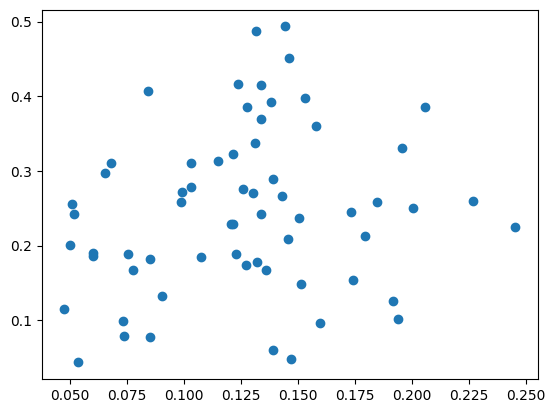

In [8]:
plt.scatter(expected, predictions)
plt.show()

### Try using the SB cut method to calculate the ICL in the artificial data and compare to the "ground truth"

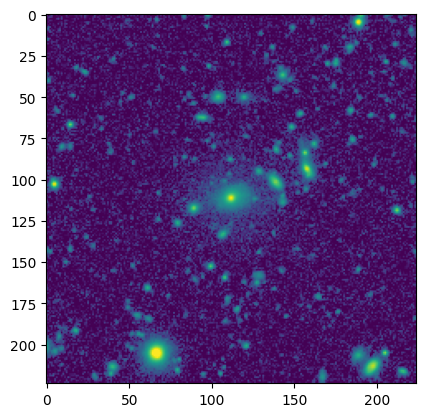

In [3]:
# If I use the same SB cut method to calculate the ICL 
# fraction of the artificial data, what do I get?
from measure_sb_cut.scripts import measure_icl 
from astropy.cosmology import FlatLambdaCDM

gen_cutouts = h5py.File('/srv/scratch/mltidal/generated_data_wparams.hdf')
lrg_info = ascii.read('/srv/scratch/z5214005/lrgs_sampled.tbl')
keys = lrg_info['new_ids']
zs = lrg_info['z']

# Measure a cutout, following the method in measure_icl.py
num = 1234
key = keys[num]
cutout = gen_cutouts[key]['HDU0']['DATA']
cosmo = FlatLambdaCDM(H0=68.4, Om0=0.301)
circ_mask = measure_icl.create_circular_mask(zs[num], cutout, cosmo, 350)
plt.imshow(stretch(cutout) * circ_mask)
plt.show()

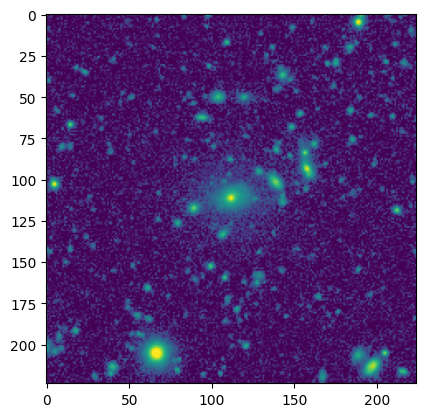

In [4]:
# Background estimate
bkg = measure_icl.background_estimate(cutout, zs[num], cosmo)
bkg_subtracted = cutout - bkg
plt.imshow(stretch(bkg_subtracted))
plt.show()

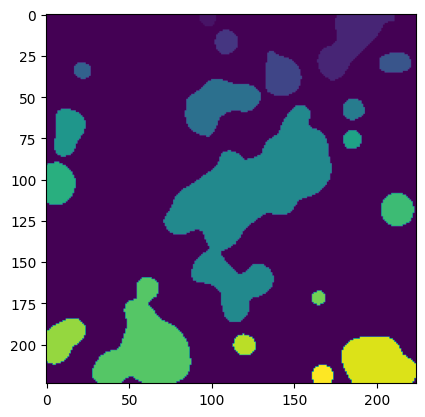

In [5]:
# Segment the image
cold_labels = measure_icl.create_cold_labels(cutout, np.zeros(cutout.shape, dtype=bool))
# Create cold mask
cold_mask = measure_icl.enlarge_mask(cold_labels, sigma=2)
plt.imshow(cold_labels)
plt.show()

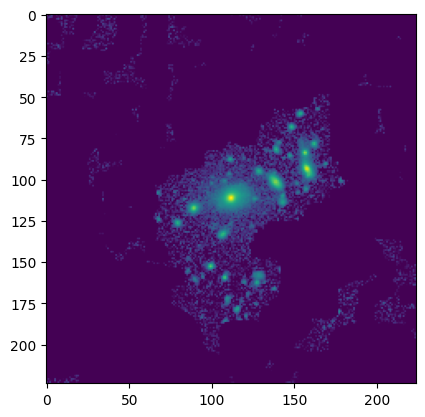

In [6]:
# Unsharp mask the image for hot mask creation
from astropy.convolution import Gaussian2DKernel, convolve
kernel = Gaussian2DKernel(5) 
conv_img = convolve(np.array(cutout), kernel)
unsharp = np.array(cutout) - conv_img

# Create hot mask
hot_mask_bkg = measure_icl.background_estimate(unsharp, zs[num], cosmo=cosmo)
hot_labels = measure_icl.create_hot_labels(unsharp, cold_mask, background=hot_mask_bkg)
hot_mask = measure_icl.enlarge_mask(hot_labels, sigma=1)

# Create the "member mask"
mid = (cutout.shape[0] // 2, cutout.shape[1] // 2)
bcg_label = cold_labels[mid[0], mid[1]]
member_mask = (cold_labels == bcg_label) | (cold_labels == 0)
non_member_mask = ~member_mask
non_member_mask = measure_icl.enlarge_mask(non_member_mask, sigma=2)
non_member_mask = non_member_mask + hot_mask
member_mask = ~non_member_mask
plt.imshow(stretch(cutout) * member_mask)
plt.show()

/tmp/ipykernel_4012410/2283418466.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


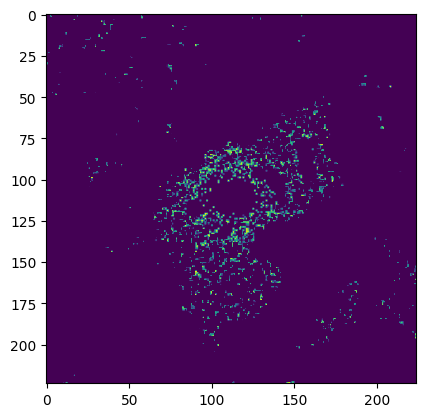

Calculated fraction = 0.07911605574680367
Actual fraction = 0.169455865914964


NameError: name 'model' is not defined

In [7]:
# Calculate surface brightness limit
from astropy.stats import sigma_clipped_stats
_, _, stddev = sigma_clipped_stats(bkg_subtracted)
sb_lim = -2.5 * np.log10(3 * stddev/(0.168 * 10)) + 2.5 * np.log10(63095734448.0194)

# Convert image from counts to surface brightness
np.seterr(invalid='ignore', divide='ignore')
sb_img = measure_icl.counts2sb(bkg_subtracted, 0)

# Mask values below surface brightness limit
sb_img[sb_img >= sb_lim] = np.nan

# Mask above the surface brightness threshold
threshold = 26 + 10 * np.log10(1 + zs[num])
mask = sb_img > threshold

# Convert the SB image back to counts
counts_img = measure_icl.sb2counts(sb_img) 

# Display the final image
masked_img = counts_img * member_mask

cmap = plt.cm.get_cmap('viridis')
cmap.set_bad(cmap(0))
plt.imshow(stretch(masked_img) * mask, cmap=cmap)
plt.show()

# Calculate the ICL fraction
print(f'Calculated fraction = {np.nansum(masked_img * mask) / np.nansum(masked_img)}')
print(f'Actual fraction = {gen_cutouts[key]["FRAC"][()]}')

img = skimage.transform.resize(cutout, (224,224))
img = np.clip(img, a_min=0, a_max=10)
img = np.arcsinh(img / 0.017359)
img = np.expand_dims(img, -1)
img = np.expand_dims(img, 0)

print(f'Model\'s guess = {model(img).mean().numpy().squeeze()}')

In [72]:
zs = lrg_info['z']

# Look at the offsets of the measured values compared to the fake values for the actual data
def calc_icl_frac(cutout, num):
    plt.figure(figsize=(8,8))
    plt.subplot(221)
    plt.imshow(stretch(cutout))
    # Background estimate
    bkg = measure_icl.background_estimate(cutout, zs[num], cosmo)
    bkg_subtracted = cutout - bkg
    plt.subplot(222)
    plt.imshow(stretch(bkg_subtracted))
    # Segment the image
    cold_labels = measure_icl.create_cold_labels(cutout, np.zeros(cutout.shape, dtype=bool))
    # Create cold mask
    cold_mask = measure_icl.enlarge_mask(cold_labels, sigma=2)

    # Unsharp mask the image for hot mask creation
    kernel = Gaussian2DKernel(5) 
    conv_img = convolve(np.array(cutout), kernel)
    unsharp = np.array(cutout) - conv_img

    # Create hot mask
    hot_mask_bkg = measure_icl.background_estimate(unsharp, zs[num], cosmo=cosmo)
    hot_labels = measure_icl.create_hot_labels(unsharp, cold_mask, background=hot_mask_bkg)
    hot_mask = measure_icl.enlarge_mask(hot_labels, sigma=1)

    # Create the "member mask"
    mid = (cutout.shape[0] // 2, cutout.shape[1] // 2)
    bcg_label = cold_labels[mid[0], mid[1]]
    member_mask = (cold_labels == bcg_label) | (cold_labels == 0)
    non_member_mask = ~member_mask
    non_member_mask = measure_icl.enlarge_mask(non_member_mask, sigma=2)
    non_member_mask = non_member_mask + hot_mask
    member_mask = ~non_member_mask
    plt.subplot(223)
    plt.imshow(stretch(cutout * member_mask))

    # Calculate surface brightness limit
    _, _, stddev = sigma_clipped_stats(bkg_subtracted)
    sb_lim = -2.5 * np.log10(3 * stddev/(0.168 * 10)) + 2.5 * np.log10(63095734448.0194)

    # Convert image from counts to surface brightness
    np.seterr(invalid='ignore', divide='ignore')
    sb_img = measure_icl.counts2sb(bkg_subtracted, 0)

    # Mask values below surface brightness limit
    sb_img[sb_img >= sb_lim] = np.nan

    # Mask above the surface brightness threshold
    threshold = 26 + 10 * np.log10(1 + zs[num])
    mask = sb_img > threshold

    # Convert the SB image back to counts
    counts_img = measure_icl.sb2counts(sb_img) 

    # Display the final image
    masked_img = counts_img * member_mask
    plt.subplot(224)
    plt.imshow(stretch(masked_img) * mask)

    return np.nansum(masked_img * mask) / np.nansum(masked_img)

def make_bkg_subtracted_img(cutout, num):
    bkg = measure_icl.background_estimate(cutout, zs[num], cosmo)
    bkg_subtracted = cutout - bkg
    return bkg_subtracted

def make_member_mask_img(cutout, num):
    bkg_subtracted = make_bkg_subtracted_img(cutout, num)
    # Segment the image
    cold_labels = measure_icl.create_cold_labels(cutout, np.zeros(cutout.shape, dtype=bool))
    # Create cold mask
    cold_mask = measure_icl.enlarge_mask(cold_labels, sigma=2)

    # Unsharp mask the image for hot mask creation
    kernel = Gaussian2DKernel(5) 
    conv_img = convolve(np.array(cutout), kernel)
    unsharp = np.array(cutout) - conv_img

    # Create hot mask
    hot_mask_bkg = measure_icl.background_estimate(unsharp, zs[num], cosmo=cosmo)
    hot_labels = measure_icl.create_hot_labels(unsharp, cold_mask, background=hot_mask_bkg)
    hot_mask = measure_icl.enlarge_mask(hot_labels, sigma=1)

    # Create the "member mask"
    mid = (cutout.shape[0] // 2, cutout.shape[1] // 2)
    bcg_label = cold_labels[mid[0], mid[1]]
    member_mask = (cold_labels == bcg_label) | (cold_labels == 0)
    non_member_mask = ~member_mask
    non_member_mask = measure_icl.enlarge_mask(non_member_mask, sigma=2)
    non_member_mask = non_member_mask + hot_mask
    member_mask = ~non_member_mask
    return member_mask

def make_threshold_mask(cutout, num):
    bkg_subtracted = make_bkg_subtracted_img(cutout, num)

    # Calculate surface brightness limit
    _, _, stddev = sigma_clipped_stats(bkg_subtracted)
    sb_lim = -2.5 * np.log10(3 * stddev/(0.168 * 10)) + 2.5 * np.log10(63095734448.0194)

    # Convert image from counts to surface brightness
    np.seterr(invalid='ignore', divide='ignore')
    sb_img = measure_icl.counts2sb(bkg_subtracted, 0)

    # Mask values below surface brightness limit
    sb_img[sb_img >= sb_lim] = np.nan

    # Mask above the surface brightness threshold
    threshold = 25 + 10 * np.log10(1 + zs[num])
    mask = sb_img > threshold
    return mask

def make_final_masked_img(cutout, num, custom_mask=None):
    bkg_subtracted = make_bkg_subtracted_img(cutout, num)
    member_mask = make_member_mask_img(cutout, num)
    # Calculate surface brightness limit
    _, _, stddev = sigma_clipped_stats(bkg_subtracted)
    sb_lim = -2.5 * np.log10(3 * stddev/(0.168 * 10)) + 2.5 * np.log10(63095734448.0194)

    # Convert image from counts to surface brightness
    np.seterr(invalid='ignore', divide='ignore')
    sb_img = measure_icl.counts2sb(bkg_subtracted, 0)

    # Mask values below surface brightness limit
    sb_img[sb_img >= sb_lim] = np.nan

    # Mask above the surface brightness threshold
    threshold = 25 + 10 * np.log10(1 + zs[num])
    mask = sb_img > threshold
    if custom_mask is not None:
        mask = custom_mask

    # Convert the SB image back to counts
    counts_img = measure_icl.sb2counts(sb_img) 

    # Display the final image
    masked_img = counts_img * member_mask
    
    return masked_img * mask

In [9]:
# Takes around 10 minutes to run
random_subset = np.random.randint(0, len(keys), size=1000)

measured = []
true = []

for num in random_subset:
    cutout = gen_cutouts[keys[num]]['HDU0']['DATA']
    measured.append(calc_icl_frac(cutout, num))
    plt.close()
    true.append(gen_cutouts[keys[num]]['FRAC'][()])

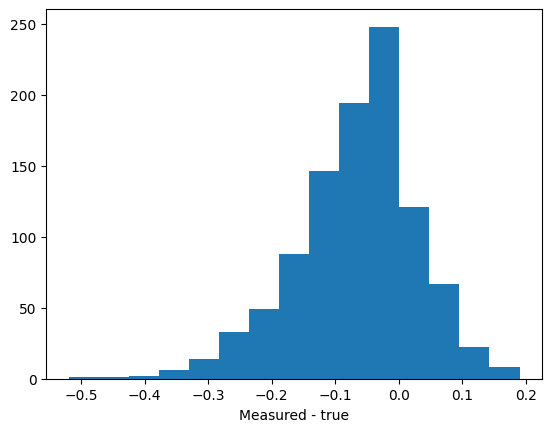

In [10]:
plt.hist(np.array(measured) - np.array(true), bins=15)
plt.xlabel('Measured - true')
plt.show()

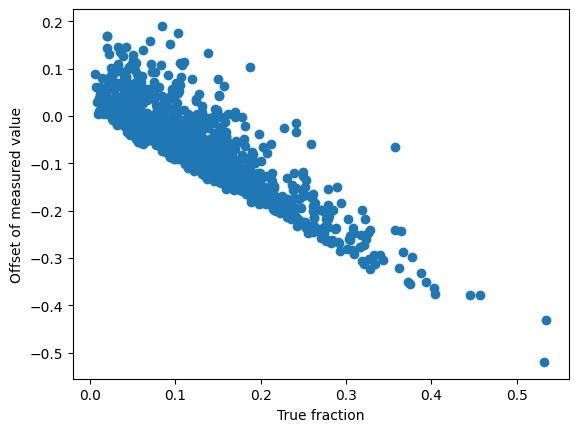

In [11]:
plt.scatter(true, np.array(measured) - np.array(true))
plt.xlabel('True fraction')
plt.ylabel('Offset of measured value')
plt.show()

In [12]:
# Find a cluster with a fraction > 0.4
for key in keys:
    if gen_cutouts[key]['FRAC'][()] > 0.4:
        print(key)
        break

13470-1661


0.4075434406501882


0.07382500526571836


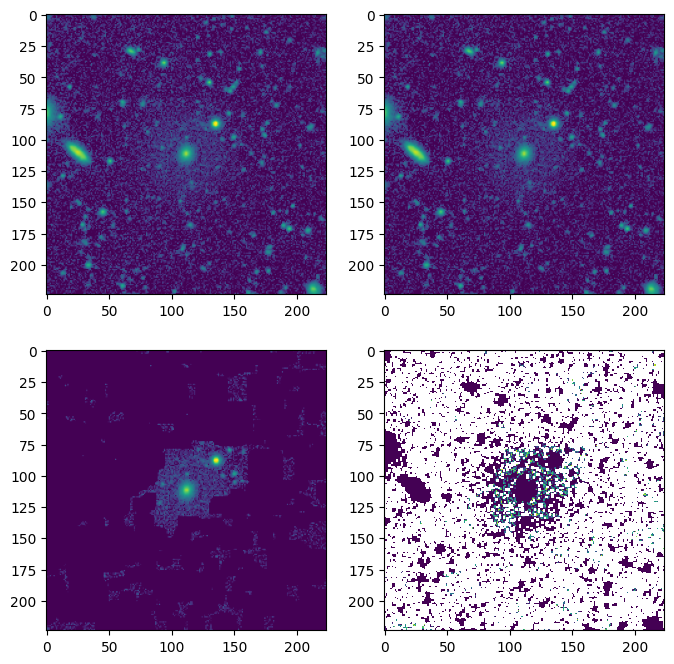

In [13]:
print(gen_cutouts['13470-1661']['FRAC'][()])
print(calc_icl_frac(gen_cutouts['13470-1661']['HDU0']['DATA'], 1661))
plt.show()

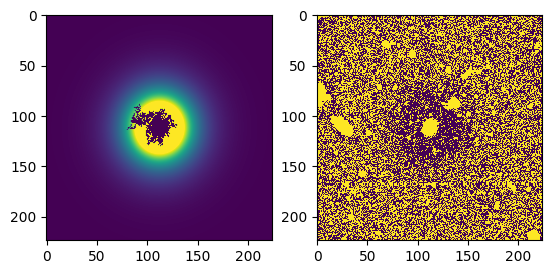

88.94353490135096
81.31226846453887


In [73]:
# How different is the recovered ICL to the injected ICL? 
from astropy.modeling.functional_models import Sersic2D
from photutils.segmentation import SourceFinder

cutout = np.array(gen_cutouts['13470-1661/HDU0/DATA'])

# Injected ICL 
amplitude = gen_cutouts['13470-1661/PARAMS/AMP'][()]
ellip = gen_cutouts['13470-1661/PARAMS/ELLIP'][()]
theta = gen_cutouts['13470-1661/PARAMS/THETA'][()]
r_eff = gen_cutouts['13470-1661/PARAMS/R_EFF'][()]

z = zs[1661]
sb_threshold = 26 + 10 * np.log10(1+z)
threshold = 10**(-0.4*(sb_threshold - 2.5*np.log10(63095734448.0194) - 5.*np.log10(0.168))) # Convert to counts
bright_parts = (cutout > threshold) 
finder = SourceFinder(npixels=20, progress_bar=False)
labels = finder(cutout, threshold).data
centre = (112, 112)
central_blob = bright_parts * (labels == labels[112,112])

model = Sersic2D(amplitude=amplitude, r_eff=r_eff, n=1, x_0=112, y_0=112, ellip=ellip, theta=theta)
x,y = np.meshgrid(np.arange(224), np.arange(224))
icl_img = np.clip(model(x,y), a_min=None, a_max=amplitude)
icl_img = np.where(central_blob, 0, icl_img)

# Recovered ICL
plt.subplot(121)
plt.imshow(icl_img)
plt.subplot(122)
masked_img = make_final_masked_img(cutout, 1661)
masked_img[np.isnan(masked_img)] = 0
mask = make_threshold_mask(cutout, 1661)
masked_img = np.where(~mask, np.nan, masked_img)
plt.imshow(~mask, interpolation='none')
plt.show()
cmap.set_bad('red')

print(np.sum(icl_img))
print(np.nansum(make_final_masked_img(cutout, 1661)))

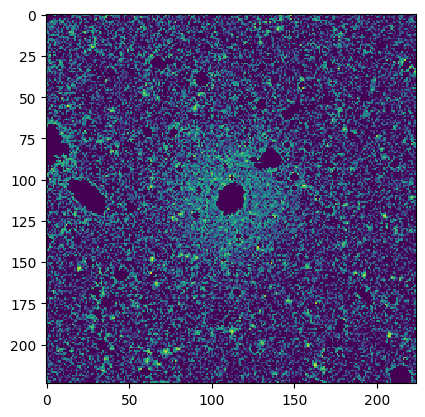

In [74]:
# Try eroding and dilating the mask to uncover more of the ICL
from skimage.morphology import binary_closing

closed_mask = binary_closing(mask)
plt.imshow(closed_mask * stretch(cutout), interpolation='none')
plt.show()

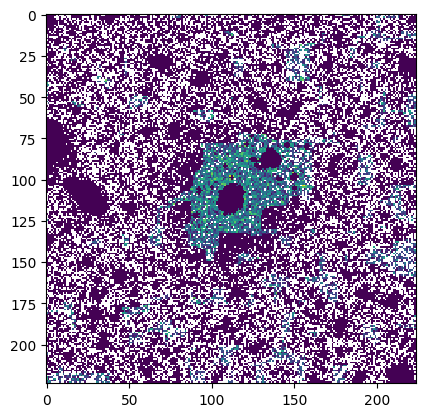

103.2979094998316


In [75]:
new_masked_img = make_final_masked_img(cutout, 1661, closed_mask)
cmap.set_bad(cmap(0))
plt.imshow(stretch(new_masked_img), interpolation='none')
plt.show()

print(np.nansum(new_masked_img))

In [83]:
def calc_icl_frac(cutout, num):
    plt.figure(figsize=(8,8))
    plt.subplot(221)
    plt.imshow(stretch(cutout))
    # Background estimate
    bkg = measure_icl.background_estimate(cutout, zs[num], cosmo)
    bkg_subtracted = cutout - bkg

    plt.subplot(222)
    plt.imshow(stretch(bkg_subtracted))
    # Segment the image
    cold_labels = measure_icl.create_cold_labels(cutout, np.zeros(cutout.shape, dtype=bool))
    # Create cold mask
    cold_mask = measure_icl.enlarge_mask(cold_labels, sigma=2)

    # Unsharp mask the image for hot mask creation
    kernel = Gaussian2DKernel(5) 
    conv_img = convolve(np.array(cutout), kernel)
    unsharp = np.array(cutout) - conv_img

    # Create hot mask
    hot_mask_bkg = measure_icl.background_estimate(unsharp, zs[num], cosmo=cosmo)
    hot_labels = measure_icl.create_hot_labels(unsharp, cold_mask, background=hot_mask_bkg)
    hot_mask = measure_icl.enlarge_mask(hot_labels, sigma=1)

    # Create the "member mask"
    mid = (cutout.shape[0] // 2, cutout.shape[1] // 2)
    bcg_label = cold_labels[mid[0], mid[1]]
    member_mask = (cold_labels == bcg_label) | (cold_labels == 0)
    non_member_mask = ~member_mask
    non_member_mask = measure_icl.enlarge_mask(non_member_mask, sigma=2)
    non_member_mask = non_member_mask + hot_mask
    member_mask = ~non_member_mask
    plt.subplot(223)
    plt.imshow(stretch(cutout * member_mask))

    # Calculate surface brightness limit
    _, _, stddev = sigma_clipped_stats(bkg_subtracted)
    sb_lim = -2.5 * np.log10(3 * stddev/(0.168 * 10)) + 2.5 * np.log10(63095734448.0194)

    # Convert image from counts to surface brightness
    np.seterr(invalid='ignore', divide='ignore')
    sb_img = measure_icl.counts2sb(bkg_subtracted, 0)

    # Mask values below surface brightness limit
    sb_img[sb_img >= sb_lim] = np.nan

    # Mask above the surface brightness threshold
    threshold = 26 + 10 * np.log10(1 + zs[num])
    mask = sb_img > threshold

    # Close the mask
    mask = binary_closing(mask)

    # Convert the SB image back to counts
    counts_img = measure_icl.sb2counts(sb_img) 

    # Display the final image
    masked_img = counts_img * member_mask
    plt.subplot(224)
    plt.imshow(stretch(masked_img) * mask)

    return np.nansum(masked_img * mask) / np.nansum(masked_img)

0.30457413614967443


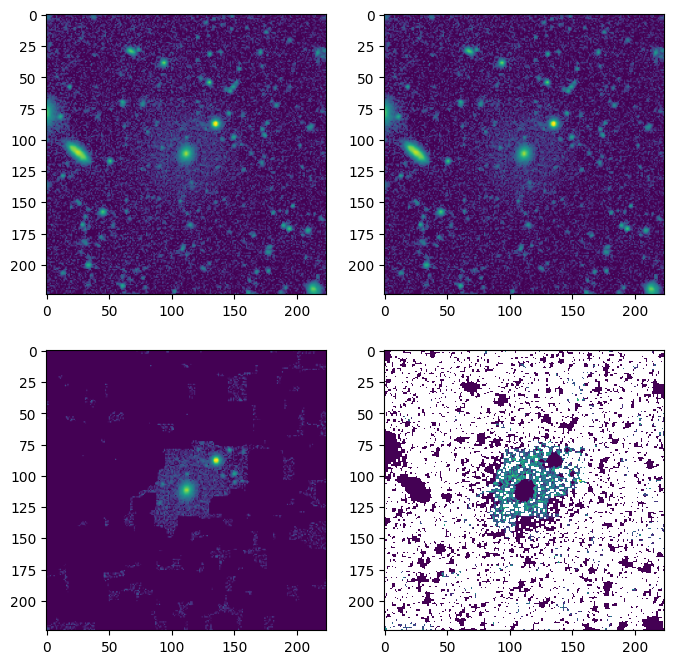

In [80]:
print(calc_icl_frac(cutout, 1661))

In [84]:
measured = []
true = []

for num in random_subset:
    cutout = gen_cutouts[keys[num]]['HDU0']['DATA']
    measured.append(calc_icl_frac(cutout, num))
    plt.close()
    true.append(gen_cutouts[keys[num]]['FRAC'][()])

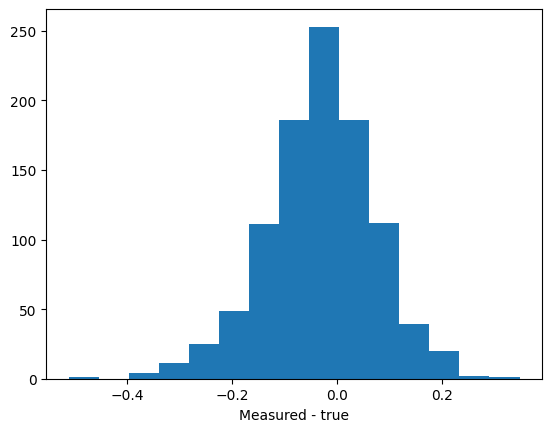

In [85]:
plt.hist(np.array(measured) - np.array(true), bins=15)
plt.xlabel('Measured - true')
plt.show()